In [4]:
import pandas as pd

# Load CSV dataset in chunks
chunks = []
for chunk in pd.read_csv("../data/python_docstrings.csv", chunksize=10000):
    chunks.append(chunk)
df = pd.concat(chunks, ignore_index=True)

print(df.shape)
print(df.columns)
df.head()

(455243, 13)
Index(['repo', 'path', 'func_name', 'original_string', 'language', 'code',
       'code_tokens', 'docstring', 'docstring_tokens', 'sha', 'url',
       'partition', 'summary'],
      dtype='object')


,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,partition,summary
0,ageitgey/face_recognition,examples/face_recognition_knn.py,train,"def train(train_dir, model_save_path=None, n_n...",python,"def train(train_dir, model_save_path=None, n_n...","['def', 'train', '(', 'train_dir', ',', 'model...",Trains a k-nearest neighbors classifier for fa...,"['Trains', 'a', 'k', '-', 'nearest', 'neighbor...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train,Train a k - nearest neighbors classifier for f...
1,ageitgey/face_recognition,examples/face_recognition_knn.py,predict,"def predict(X_img_path, knn_clf=None, model_pa...",python,"def predict(X_img_path, knn_clf=None, model_pa...","['def', 'predict', '(', 'X_img_path', ',', 'kn...",Recognizes faces in given image using a traine...,"['Recognizes', 'faces', 'in', 'given', 'image'...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train,Predicts faces in a given image using a KNN cl...
2,ageitgey/face_recognition,examples/face_recognition_knn.py,show_prediction_labels_on_image,"def show_prediction_labels_on_image(img_path, ...",python,"def show_prediction_labels_on_image(img_path, ...","['def', 'show_prediction_labels_on_image', '('...",Shows the face recognition results visually.\n...,"['Shows', 'the', 'face', 'recognition', 'resul...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train,Show the face recognition results visually.
3,ageitgey/face_recognition,face_recognition/api.py,_rect_to_css,"def _rect_to_css(rect):\n """"""\n Convert ...",python,"def _rect_to_css(rect):\n """"""\n Convert ...","['def', '_rect_to_css', '(', 'rect', ')', ':',...",Convert a dlib 'rect' object to a plain tuple ...,"['Convert', 'a', 'dlib', 'rect', 'object', 'to...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train,Convert a dlib rect object to a plain tuple in...
4,ageitgey/face_recognition,face_recognition/api.py,_trim_css_to_bounds,"def _trim_css_to_bounds(css, image_shape):\n ...",python,"def _trim_css_to_bounds(css, image_shape):\n ...","['def', '_trim_css_to_bounds', '(', 'css', ','...","Make sure a tuple in (top, right, bottom, left...","['Make', 'sure', 'a', 'tuple', 'in', '(', 'top...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train,Trim the given CSS tuple to the bounds of the ...


Dataset shape: (455243, 13)
Partitions:
 partition
train    410175
valid     22977
test      22091
Name: count, dtype: int64
Missing values:
 repo                0
path                0
func_name           2
original_string     0
language            0
code                0
code_tokens         0
docstring           0
docstring_tokens    0
sha                 0
url                 0
partition           0
summary             0
dtype: int64
Average code length: 100.35845691202282
Average docstring length: 37.99253805110677
Max code length: 12042
Max docstring length: 6371


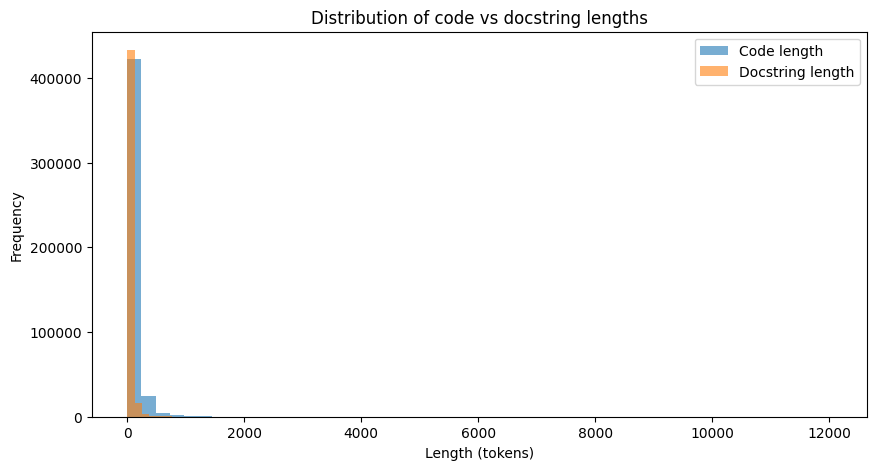

In [5]:
import matplotlib.pyplot as plt

# Check dataset size and partitions
print("Dataset shape:", df.shape)
print("Partitions:\n", df['partition'].value_counts())

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Add length columns
df['code_len'] = df['code'].apply(lambda x: len(str(x).split()))
df['doc_len'] = df['docstring'].apply(lambda x: len(str(x).split()))

# Basic stats
print("Average code length:", df['code_len'].mean())
print("Average docstring length:", df['doc_len'].mean())
print("Max code length:", df['code_len'].max())
print("Max docstring length:", df['doc_len'].max())

# Plot histograms
plt.figure(figsize=(10,5))
plt.hist(df['code_len'], bins=50, alpha=0.6, label="Code length")
plt.hist(df['doc_len'], bins=50, alpha=0.6, label="Docstring length")
plt.legend()
plt.xlabel("Length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of code vs docstring lengths")
plt.show()


In [6]:
# Keep only relevant columns
clean_df = df[['code', 'docstring', 'summary', 'partition']].dropna()

# Save
clean_df.to_csv("../data/clean_dataset.csv", index=False)

print("Clean dataset saved! Shape:", clean_df.shape)


Clean dataset saved! Shape: (455243, 4)
